In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch02 딥러닝입문 분류분석</font>

In [2]:
from tensorflow.keras.utils import to_categorical  # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential  # 모델 생성
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 머신러닝/딥러닝 : 데이터의 법칙성을 추출

- 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단,... ※ ML/DL의 종류
- 지도학습(독립 = 입력변수와 종속 = 타겟 = 출력변수가 모두 주어졌을 경우) 회귀분석(타겟변수가 연속형) vs 분류분석(multi, binary)
- 비지도학습(입력변수만) 군집화
- 강화학습

※ 지도학습에서의 ML, DL 프로그래밍 방식

1. 데이터 셋 확보(input = 입력변수, target = 종속변수) 원본 데이터 및 시뮬레이션을 통해 데이터 생성
2. 전처리 스케일 조정 훈련셋(학습셋), 검증셋, 시험셋(테스트셋) 학습 및 평가 가능한 포맷으로 변환
3. 모델 구성 Sequential 객체 생성뒤 필요한 층을 add()함수로 추가
4. 모델 학습과정 설정 compile()함수 이용. 손실함수, optimizer, metrics(평가지표)
5. 모델 학습시키기 (ft. 학습과정 지켜보기) fit()함수 이용 - 훈련셋입력 = 독립변수, 훈련셋타겟=종속변수, 학습횟수, 검증셋
6. 모델 평가 시험셋(테스트셋)을 인자로 넣은 evaluate()함수 이용, 그래프
7. 모델 사용 predict() 이용. 입력데이터는 2차원 데이터
8. 모델 저장 save()함수이용해서 저장. 저장된 모델은 load_model()함수를 이용해서 불러올 수 있음

# 1. 데이터 셋 생성

# 2. 데이터 전처리

In [3]:
# 학습데이터 = 훈련데이터

x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9] * 10)
y_train = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18] * 10)

# 검증데이터

x_val = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_val = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18])

# 테스트셋 = 시험데이터

x_test = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_test = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18])
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((90,), (9,), (9,), (90,), (9,), (9,))

In [4]:
# 인코딩 종류

from sklearn.preprocessing import LabelEncoder

data = np.array(['a', 'b', 'c', 'd'])
print('원 데이터 :', data)
le = LabelEncoder()
# le.fit(data)
# labeled_data = le.transform(data)
labeled_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', labeled_data)
one_hot_encoded_data = to_categorical(labeled_data)
print('원핫인코딩된 데이터 :', one_hot_encoded_data)

원 데이터 : ['a' 'b' 'c' 'd']
라벨인코딩된 데이터 : [0 1 2 3]
원핫인코딩된 데이터 : [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# 분류분석을 위기 위해, target을 원핫인코딩(라벨링 전환)

import pandas as pd

data = np.array([1, 2, 2, 4, 2])
print(data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원핫인코딩 :\n', categorical_one_hot)
get_dumies_one_hot = pd.get_dummies(data)
display('get_dumies를 이용한 원핫인코딩 :', get_dumies_one_hot)
print(type(categorical_one_hot))
print(type(get_dumies_one_hot))

[1 2 2 4 2]
to_categorical을 이용한 원핫인코딩 :
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dumies를 이용한 원핫인코딩 :'

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
# 분류분석을 위한 target변수 라벨링 전환(원핫인코딩)

Y_train = to_categorical(y_train, 19)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

In [7]:
print('훈련셋 구조:', x_train.shape, Y_train.shape)  # 독립변수 1개, 타겟변수 19개
print('검증셋 구조:', x_val.shape, Y_val.shape)
print('테스트셋 구조:', x_test.shape, Y_test.shape)

훈련셋 구조: (90,) (90, 19)
검증셋 구조: (9,) (9, 19)
테스트셋 구조: (9,) (9, 19)


# 3. 모델 구성하기

In [8]:
model = Sequential()
model.add(Input(shape = (1,)))  # 입력층
model.add(Dense(units = 38, activation = 'sigmoid'))  # units출력수, 활성화함수:relu, tanh
model.add(Dense(units = 64, activation = 'elu'))
model.add(Dense(units = 32, activation = 'elu'))
model.add(Dense(units = 19, activation = 'softmax'))
# softmax : 모든 출력결과의 합이 1. 분류분석 마지막 layer(출력층)에서 activation으로
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정

In [9]:
model.compile(loss = 'categorical_crossentropy',  # 분류분석에서의 손실함수 (원핫인코딩有)
              optimizer = 'sgd',
              metrics = ['accuracy'])  # 평가지표 : accuracy

# 5. 모델 학습시키기

In [10]:
hist = model.fit(x_train, Y_train,
                 epochs = 300,
                 batch_size = 10,
                 verbose = 2,  # 학습결과 출력 옵션 (0 : 출력없음, 1 : 기본값, 2 : epochs별 로그 상세 출력)
                 validation_data = (x_val, Y_val)
                )

Epoch 1/300
9/9 - 1s - loss: 2.9757 - accuracy: 0.0222 - val_loss: 2.8750 - val_accuracy: 0.1111 - 577ms/epoch - 64ms/step
Epoch 2/300
9/9 - 0s - loss: 2.8295 - accuracy: 0.1444 - val_loss: 2.7616 - val_accuracy: 0.1111 - 40ms/epoch - 4ms/step
Epoch 3/300
9/9 - 0s - loss: 2.7346 - accuracy: 0.1222 - val_loss: 2.6784 - val_accuracy: 0.1111 - 41ms/epoch - 5ms/step
Epoch 4/300
9/9 - 0s - loss: 2.6579 - accuracy: 0.1111 - val_loss: 2.6115 - val_accuracy: 0.1111 - 42ms/epoch - 5ms/step
Epoch 5/300
9/9 - 0s - loss: 2.5966 - accuracy: 0.1111 - val_loss: 2.5547 - val_accuracy: 0.1111 - 41ms/epoch - 5ms/step
Epoch 6/300
9/9 - 0s - loss: 2.5463 - accuracy: 0.1111 - val_loss: 2.5044 - val_accuracy: 0.1111 - 40ms/epoch - 4ms/step
Epoch 7/300
9/9 - 0s - loss: 2.4975 - accuracy: 0.1222 - val_loss: 2.4588 - val_accuracy: 0.2222 - 36ms/epoch - 4ms/step
Epoch 8/300
9/9 - 0s - loss: 2.4532 - accuracy: 0.1556 - val_loss: 2.4175 - val_accuracy: 0.2222 - 41ms/epoch - 5ms/step
Epoch 9/300
9/9 - 0s - loss: 2

Epoch 69/300
9/9 - 0s - loss: 1.5773 - accuracy: 0.4444 - val_loss: 1.5461 - val_accuracy: 0.5556 - 38ms/epoch - 4ms/step
Epoch 70/300
9/9 - 0s - loss: 1.5649 - accuracy: 0.4889 - val_loss: 1.5348 - val_accuracy: 0.4444 - 37ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 1.5533 - accuracy: 0.3889 - val_loss: 1.5251 - val_accuracy: 0.6667 - 37ms/epoch - 4ms/step
Epoch 72/300
9/9 - 0s - loss: 1.5393 - accuracy: 0.5556 - val_loss: 1.5148 - val_accuracy: 0.6667 - 39ms/epoch - 4ms/step
Epoch 73/300
9/9 - 0s - loss: 1.5282 - accuracy: 0.5778 - val_loss: 1.5043 - val_accuracy: 0.6667 - 37ms/epoch - 4ms/step
Epoch 74/300
9/9 - 0s - loss: 1.5190 - accuracy: 0.4889 - val_loss: 1.4948 - val_accuracy: 0.5556 - 35ms/epoch - 4ms/step
Epoch 75/300
9/9 - 0s - loss: 1.5110 - accuracy: 0.4111 - val_loss: 1.4853 - val_accuracy: 0.6667 - 42ms/epoch - 5ms/step
Epoch 76/300
9/9 - 0s - loss: 1.5052 - accuracy: 0.5667 - val_loss: 1.4747 - val_accuracy: 0.6667 - 36ms/epoch - 4ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 1.0564 - accuracy: 0.8111 - val_loss: 1.0284 - val_accuracy: 0.8889 - 38ms/epoch - 4ms/step
Epoch 137/300
9/9 - 0s - loss: 1.0521 - accuracy: 0.8000 - val_loss: 1.0235 - val_accuracy: 0.8889 - 37ms/epoch - 4ms/step
Epoch 138/300
9/9 - 0s - loss: 1.0387 - accuracy: 0.8444 - val_loss: 1.0170 - val_accuracy: 0.8889 - 37ms/epoch - 4ms/step
Epoch 139/300
9/9 - 0s - loss: 1.0468 - accuracy: 0.7556 - val_loss: 1.0111 - val_accuracy: 0.7778 - 43ms/epoch - 5ms/step
Epoch 140/300
9/9 - 0s - loss: 1.0236 - accuracy: 0.8333 - val_loss: 1.0075 - val_accuracy: 0.8889 - 38ms/epoch - 4ms/step
Epoch 141/300
9/9 - 0s - loss: 1.0388 - accuracy: 0.7778 - val_loss: 1.0063 - val_accuracy: 0.7778 - 37ms/epoch - 4ms/step
Epoch 142/300
9/9 - 0s - loss: 1.0310 - accuracy: 0.7889 - val_loss: 0.9966 - val_accuracy: 0.6667 - 39ms/epoch - 4ms/step
Epoch 143/300
9/9 - 0s - loss: 1.0213 - accuracy: 0.7556 - val_loss: 0.9907 - val_accuracy: 0.8889 - 35ms/epoch - 4ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.7484 - accuracy: 0.8778 - val_loss: 0.7189 - val_accuracy: 0.8889 - 38ms/epoch - 4ms/step
Epoch 204/300
9/9 - 0s - loss: 0.7472 - accuracy: 0.8667 - val_loss: 0.7181 - val_accuracy: 0.8889 - 37ms/epoch - 4ms/step
Epoch 205/300
9/9 - 0s - loss: 0.7501 - accuracy: 0.8778 - val_loss: 0.7230 - val_accuracy: 0.8889 - 37ms/epoch - 4ms/step
Epoch 206/300
9/9 - 0s - loss: 0.7448 - accuracy: 0.8778 - val_loss: 0.7063 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 207/300
9/9 - 0s - loss: 0.7296 - accuracy: 0.8556 - val_loss: 0.7075 - val_accuracy: 0.8889 - 42ms/epoch - 5ms/step
Epoch 208/300
9/9 - 0s - loss: 0.7294 - accuracy: 0.8111 - val_loss: 0.6996 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 209/300
9/9 - 0s - loss: 0.7350 - accuracy: 0.8333 - val_loss: 0.6942 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 210/300
9/9 - 0s - loss: 0.7249 - accuracy: 0.9111 - val_loss: 0.7003 - val_accuracy: 0.8889 - 44ms/epoch - 5ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.5255 - accuracy: 0.9667 - val_loss: 0.5139 - val_accuracy: 0.8889 - 37ms/epoch - 4ms/step
Epoch 271/300
9/9 - 0s - loss: 0.5384 - accuracy: 0.9333 - val_loss: 0.5359 - val_accuracy: 0.7778 - 38ms/epoch - 4ms/step
Epoch 272/300
9/9 - 0s - loss: 0.5453 - accuracy: 0.9000 - val_loss: 0.4994 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 273/300
9/9 - 0s - loss: 0.5247 - accuracy: 0.9111 - val_loss: 0.5011 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 274/300
9/9 - 0s - loss: 0.5123 - accuracy: 0.9889 - val_loss: 0.4888 - val_accuracy: 1.0000 - 35ms/epoch - 4ms/step
Epoch 275/300
9/9 - 0s - loss: 0.5236 - accuracy: 0.9333 - val_loss: 0.5052 - val_accuracy: 0.8889 - 38ms/epoch - 4ms/step
Epoch 276/300
9/9 - 0s - loss: 0.5157 - accuracy: 0.9111 - val_loss: 0.4832 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 277/300
9/9 - 0s - loss: 0.5043 - accuracy: 0.9667 - val_loss: 0.4913 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 278/300
9/

# 6. 모델 평가하기 (모델 학습 과정 살펴보고, evalute) 

In [11]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

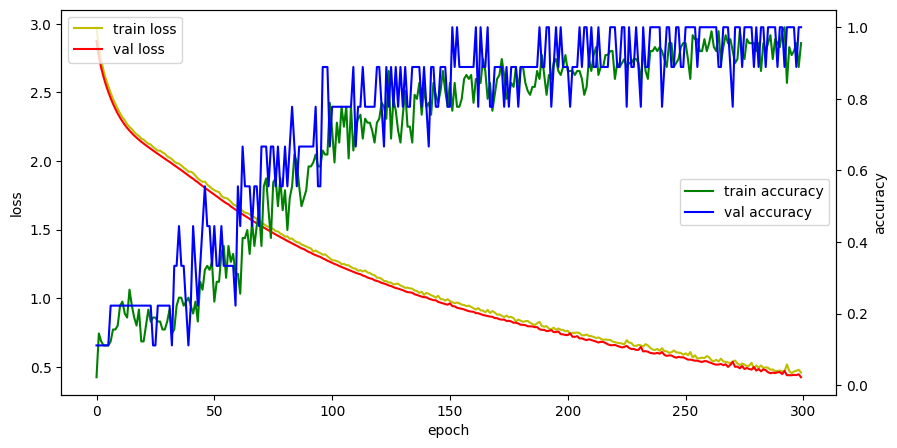

In [12]:
# 모델 학습 과정 시각화

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()  # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label = 'val accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'center right')
plt.show()

In [13]:
# 모델 평가

score = model.evaluate(x_test, Y_test, batch_size = 1)

9/9 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 1.0000


In [14]:
score  # loss, accuracy

[0.42372116446495056, 1.0]

In [15]:
print('평가된 loss :', score[0])
print('평가된 accuracy', score[1] * 100, '%')

평가된 loss : 0.42372116446495056
평가된 accuracy 100.0 %


# 7. 모델 사용하기

In [16]:
H = model.predict(np.array([[2]]))
H

1/1 [==============================] - 0s 109ms/step


array([[1.3295818e-14, 3.9143707e-14, 1.0381143e-01, 2.0401247e-10,
        7.6070291e-01, 3.4698357e-12, 1.3424899e-01, 1.2854505e-12,
        1.2356644e-03, 6.7581583e-12, 1.0416888e-06, 5.4850700e-11,
        7.5931073e-10, 7.4358987e-13, 1.4397116e-14, 2.9140483e-15,
        5.3784441e-19, 5.1677684e-10, 1.8435466e-24]], dtype=float32)

In [17]:
# 분류분석의 예측은 predict() 후 argmax()

model.predict(np.array([[2]])).argmax()

1/1 [==============================] - 0s 24ms/step


4

In [18]:
# 4를 몇 % 확률로 예측했는지

H[0, H.argmax()] * 100

76.0702908039093

# 8. 모델 저장하기

In [19]:
# model.save('model/02_deep.h5')

from tensorflow.keras.models import save_model

save_model(model, 'model/02_deep.h5')

## 저장된 모델 사용하기

In [20]:
from tensorflow.keras.models import load_model

model2 = load_model('model/02_deep.h5')

In [21]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


In [22]:
data = np.array([[2], 
                 [3]])
predictions = model2.predict(data)
predictions.argmax(axis = -1)

1/1 [==============================] - 0s 61ms/step


array([4, 6], dtype=int64)

In [23]:
def predict_classes(model, data) :
    predictions = model.predict(data)
    return predictions.argmax(axis = -1)

In [27]:
import tensorflow as tf
@tf.function(reduce_retracing = True)

def predict_classes(model, data) :
    predictions = model(data, training = False)
    return tf.argmax(predictions, axis = -1)

In [28]:
import numpy as np

input_data = int(input('어떤 데이터를 예측할까요? '))
data = np.array([[input_data]])
print('예측된 분류는 ', predict_classes(model2, data))

어떤 데이터를 예측할까요? 3
예측된 분류는  tf.Tensor([6], shape=(1,), dtype=int64)
